## Spectral graph analysis - LPF

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from argparse import Namespace
from functools import reduce

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def fft(yt):
    n = len(yt) # length of the signal
    k = np.arange(n)
    T = n/2
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range
    # -------------
    FFTYT = np.fft.fft(yt)/n # fft computing and normalization
    FFTYT = FFTYT[range(n//2)]
    fftyt = abs(FFTYT)
    return frq, fftyt
    

# Synthetic data

## FEDFormer

In [3]:
pred_init = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/low/FEDFormer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/low/FEDFormer/true.npy')

### Visualization per epoch

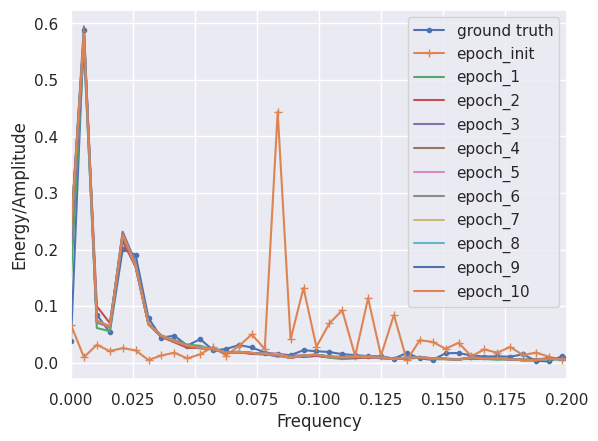

In [4]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/FEDFormer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

## spectrum visualization: init, first, last

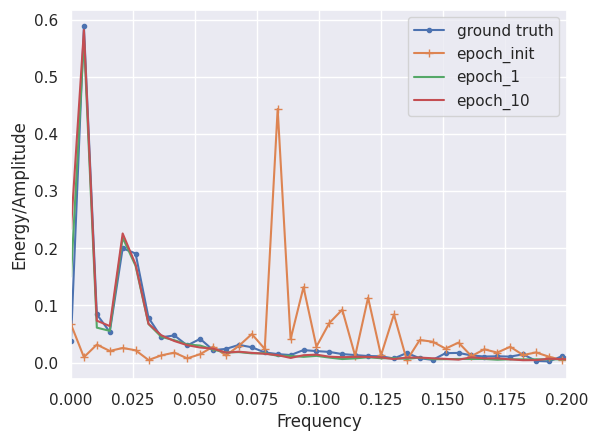

In [5]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])

plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/FEDFormer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [6]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)

  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [7]:
fed_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_fed =  pd.DataFrame(fed_dict)
df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.073508,0.257117,0.117483,0.113730,0.118940,0.110072,0.108789,0.108815,0.109200,0.108878,0.108869,0.108874
1,0.005208,0.610915,0.010784,0.543161,0.555621,0.577733,0.571534,0.568649,0.571806,0.572581,0.571738,0.572051,0.572045
2,0.010417,0.079223,0.019500,0.073475,0.072982,0.073878,0.075541,0.073520,0.074250,0.073626,0.073708,0.074107,0.073988
3,0.015625,0.073176,0.011463,0.071824,0.069679,0.073186,0.072321,0.071602,0.072109,0.071975,0.071983,0.072104,0.072070
4,0.020833,0.230323,0.015826,0.228641,0.229490,0.230896,0.230280,0.228888,0.229991,0.229990,0.229986,0.229699,0.229748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.007950,0.002079,0.001163,0.001176,0.001148,0.001196,0.001183,0.001206,0.001200,0.001221,0.001222,0.001221
188,0.979167,0.008003,0.002162,0.001219,0.001163,0.001180,0.001160,0.001169,0.001187,0.001186,0.001202,0.001202,0.001201
189,0.984375,0.009431,0.002404,0.001290,0.001269,0.001207,0.001274,0.001260,0.001275,0.001261,0.001285,0.001285,0.001284
190,0.989583,0.009830,0.002477,0.001162,0.001214,0.001186,0.001219,0.001211,0.001237,0.001227,0.001247,0.001250,0.001248


In [8]:
x = df_fed.iloc[1:2, :]
y = df_fed.iloc[4:5, :]
sub_df_fed = pd.concat([x, y])
sub_df_fed

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.610915,0.010784,0.543161,0.555621,0.577733,0.571534,0.568649,0.571806,0.572581,0.571738,0.572051,0.572045
4,0.020833,0.230323,0.015826,0.228641,0.229490,0.230896,0.230280,0.228888,0.229991,0.229990,0.229986,0.229699,0.229748


In [9]:
def fed_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']

  return new_df

In [10]:
fed_ratios = fed_ratio(sub_df_fed)
fed_ratios = fed_ratios.drop('frequency', axis=1)
fed_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.017652,0.889093,0.909489,0.945685,0.935536,0.930815,0.935983,0.937252,0.935871,0.936384,0.936373
4,0.068710,0.992695,0.996385,1.002490,0.999811,0.993770,0.998560,0.998552,0.998535,0.997289,0.997505


In [11]:
low = fed_ratios.iloc[0, :]
high = fed_ratios.iloc[-1, :]

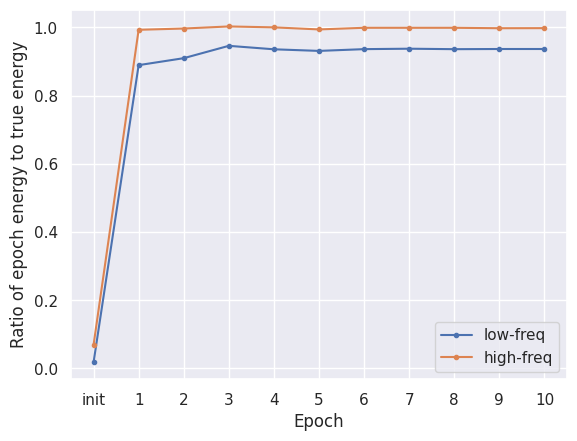

In [12]:
plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(fed_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/low/FEDFormer/spectral_graphs/spectrum_ratio.png')
plt.show()

## AutoFormer

In [13]:
pred_init = np.load('/pred_files/synthetic_data/low/Autoformer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/low/Autoformer/pred_8.npy')
actual = np.load('/pred_files/synthetic_data/low/Autoformer/true.npy')

### Visualization per epoch

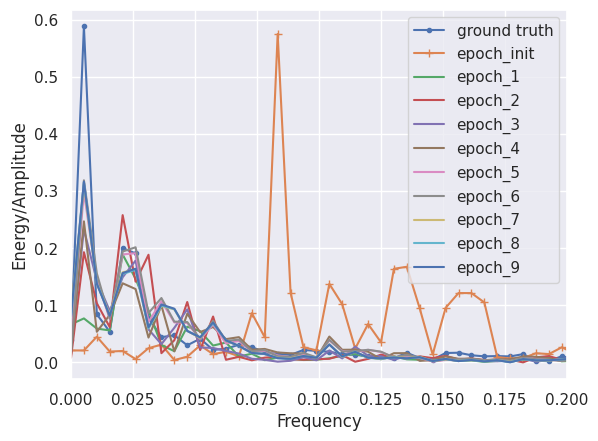

In [14]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)


ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/Autoformer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

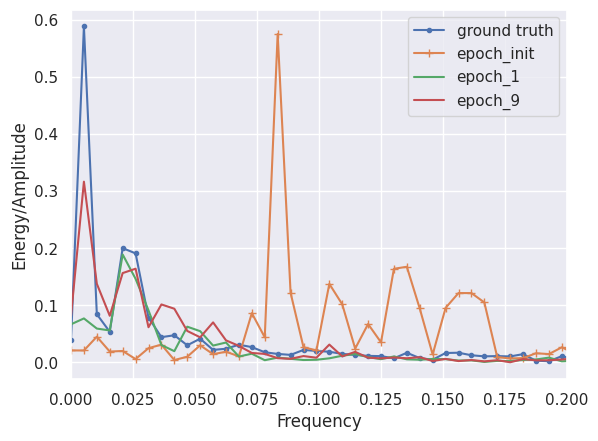

In [15]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq8,energy8)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_9'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/Autoformer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [16]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [17]:
auto_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8}

df_auto =  pd.DataFrame(auto_dict)
df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy
0,0.000000,0.073508,0.259641,0.254987,0.250368,0.252559,0.250451,0.253720,0.250351,0.253448,0.253731,0.253481
1,0.005208,0.610915,0.019913,0.133902,0.167665,0.167400,0.175757,0.164802,0.168005,0.166360,0.162952,0.164675
2,0.010417,0.079223,0.017775,0.095580,0.114258,0.130627,0.140717,0.127408,0.128382,0.127791,0.125648,0.126199
3,0.015625,0.073176,0.015541,0.115799,0.146289,0.133739,0.156721,0.144914,0.145323,0.146119,0.142146,0.143503
4,0.020833,0.230323,0.015768,0.094441,0.106488,0.115458,0.126626,0.125914,0.129313,0.127078,0.126748,0.127636
...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.007950,0.007113,0.002070,0.002482,0.002441,0.001990,0.002041,0.002058,0.001989,0.001962,0.001970
188,0.979167,0.008003,0.007349,0.001998,0.002452,0.002381,0.002012,0.002079,0.002138,0.002021,0.001988,0.002017
189,0.984375,0.009431,0.007349,0.001810,0.002649,0.002455,0.002034,0.002109,0.002172,0.002017,0.002008,0.002019
190,0.989583,0.009830,0.007689,0.001939,0.002623,0.002483,0.002095,0.002185,0.002238,0.002116,0.002091,0.002104


In [18]:
x = df_auto.iloc[1:2, :]
y = df_auto.iloc[4:5, :]
sub_df_auto = pd.concat([x, y])
sub_df_auto

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy
1,0.005208,0.610915,0.019913,0.133902,0.167665,0.167400,0.175757,0.164802,0.168005,0.166360,0.162952,0.164675
4,0.020833,0.230323,0.015768,0.094441,0.106488,0.115458,0.126626,0.125914,0.129313,0.127078,0.126748,0.127636


In [19]:
def auto_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(9)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [20]:
auto_ratios = auto_ratio(sub_df_auto)
auto_ratios = auto_ratios.drop('frequency', axis=1)
auto_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio
1,0.032596,0.219182,0.274449,0.274016,0.287694,0.269762,0.275005,0.272313,0.266734,0.269555
4,0.068459,0.410038,0.462342,0.501287,0.549774,0.546684,0.561441,0.551737,0.550306,0.554161


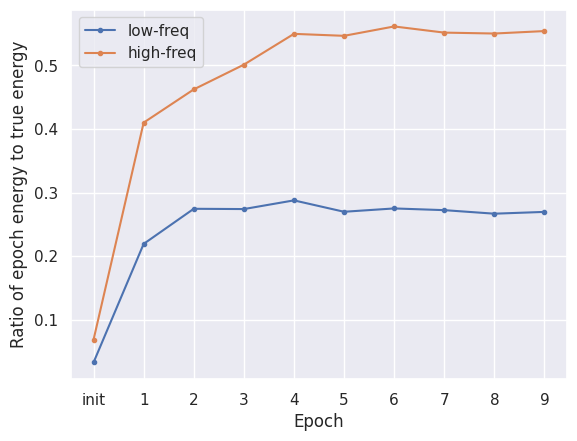

In [21]:
low = auto_ratios.iloc[0, :]
high = auto_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(auto_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/low/Autoformer/spectral_graphs/spectrum_ratio.png')
plt.show()

### InFormer

In [22]:
pred_init = np.load('/pred_files/synthetic_data/low/Informer/pred_-1.npy')
pred_0 = np.load('/pred_files/synthetic_data/low/Informer/pred_0.npy')
pred_1 = np.load('/pred_files/synthetic_data/low/Informer/pred_1.npy')
pred_2 = np.load('/pred_files/synthetic_data/low/Informer/pred_2.npy')
pred_3 = np.load('/pred_files/synthetic_data/low/Informer/pred_3.npy')
pred_4 = np.load('/pred_files/synthetic_data/low/Informer/pred_4.npy')
pred_5 = np.load('/pred_files/synthetic_data/low/Informer/pred_5.npy')
pred_6 = np.load('/pred_files/synthetic_data/low/Informer/pred_6.npy')
pred_7 = np.load('/pred_files/synthetic_data/low/Informer/pred_7.npy')
pred_8 = np.load('/pred_files/synthetic_data/low/Informer/pred_8.npy')
pred_9 = np.load('/pred_files/synthetic_data/low/Informer/pred_9.npy')
actual = np.load('/pred_files/synthetic_data/low/Informer/true.npy')

### Visualization per epoch

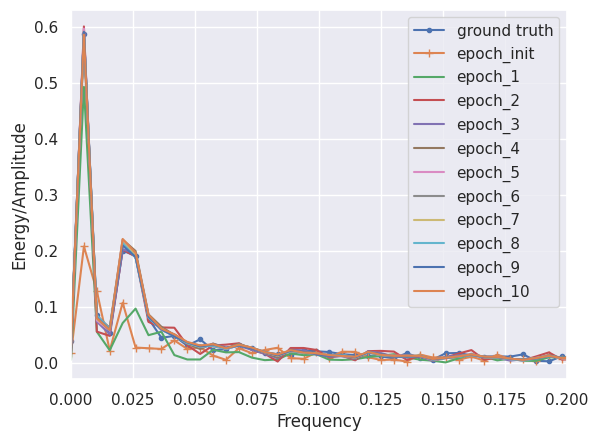

In [23]:
idx = 100
ts_init = pred_init[idx,:,0]
freq_init,energy_init = fft(ts_init)

ts0 = pred_0[idx,:,0]
freq0,energy0 = fft(ts0)

ts1 = pred_1[idx,:,0]
freq1,energy1 = fft(ts1)

ts2 = pred_2[idx,:,0]
freq2,energy2 = fft(ts2)

ts3 = pred_3[idx,:,0]
freq3,energy3 = fft(ts3)

ts4 = pred_4[idx,:,0]
freq4,energy4 = fft(ts4)

ts5 = pred_5[idx,:,0]
freq5,energy5 = fft(ts5)

ts6 = pred_6[idx,:,0]
freq6,energy6 = fft(ts6)

ts7 = pred_7[idx,:,0]
freq7,energy7 = fft(ts7)

ts8 = pred_8[idx,:,0]
freq8,energy8 = fft(ts8)

ts9 = pred_9[idx,:,0]
freq9,energy9 = fft(ts9)

ts_actual = actual[idx,:,0]
freq_actual,energy_actual = fft(ts_actual)

plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq1,energy1)
plt.plot(freq2,energy2)
plt.plot(freq3,energy3)
plt.plot(freq4,energy4)
plt.plot(freq5,energy5)
plt.plot(freq6,energy6)
plt.plot(freq7,energy7)
plt.plot(freq8,energy8)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1', 'epoch_2', 'epoch_3', 'epoch_4', 'epoch_5', 'epoch_6', 'epoch_7', 'epoch_8', 'epoch_9', 'epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/Informer/spectral_graphs/spectrum_visualization_per_epoch.png')
plt.show()

### spectrum visualization: init, first, last

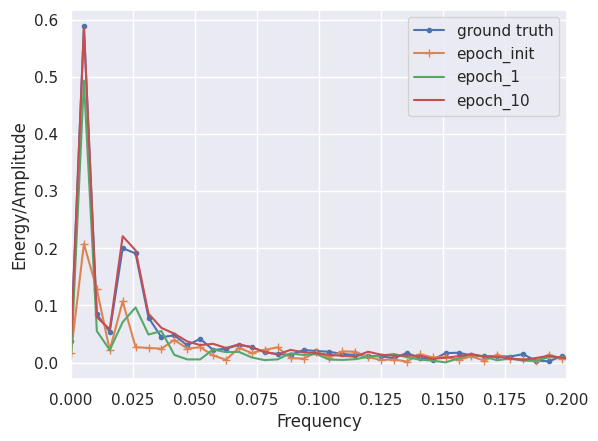

In [24]:
plt.plot(freq_actual,energy_actual, marker='.')
plt.plot(freq_init, energy_init, marker='+')
plt.plot(freq0,energy0)
plt.plot(freq9,energy9)

plt.legend(['ground truth', 'epoch_init', 'epoch_1','epoch_10'])

plt.xlim([0,0.2])
plt.xlabel('Frequency')
plt.ylabel('Energy/Amplitude')
plt.savefig('/results/synthetic_data/low/Informer/spectral_graphs/spectrum_visualization_init_first_last.png')
plt.show()

### pred_spectrum / true_spectrum 

In [25]:
e_actual = np.zeros((192,))
e_init = np.zeros((192,))
e0 = np.zeros((192,))
e1 = np.zeros((192,))
e2 = np.zeros((192,))
e3 = np.zeros((192,))
e4 = np.zeros((192,))
e5 = np.zeros((192,))
e6 = np.zeros((192,))
e7 = np.zeros((192,))
e8 = np.zeros((192,))
e9 = np.zeros((192,))


for i in range(2496):
  idx = i
  ts_init = pred_init[idx,:,0]
  freq_init,energy_init = fft(ts_init)

  ts0 = pred_0[idx,:,0]
  freq0,energy0 = fft(ts0)

  ts1 = pred_1[idx,:,0]
  freq1,energy1 = fft(ts1)

  ts2 = pred_2[idx,:,0]
  freq2,energy2 = fft(ts2)

  ts3 = pred_3[idx,:,0]
  freq3,energy3 = fft(ts3)

  ts4 = pred_4[idx,:,0]
  freq4,energy4 = fft(ts4)

  ts5 = pred_5[idx,:,0]
  freq5,energy5 = fft(ts5)

  ts6 = pred_6[idx,:,0]
  freq6,energy6 = fft(ts6)

  ts7 = pred_7[idx,:,0]
  freq7,energy7 = fft(ts7)

  ts8 = pred_8[idx,:,0]
  freq8,energy8 = fft(ts8)

  ts9 = pred_9[idx,:,0]
  freq9,energy9 = fft(ts9)

  ts_actual = actual[idx,:,0]
  freq_actual,energy_actual = fft(ts_actual)
  
  e_actual += energy_actual
  e_init += energy_init
  e0 += energy0
  e1 += energy1
  e2 += energy2
  e3 += energy3
  e4 += energy4
  e5 += energy5
  e6 += energy6
  e7 += energy7
  e8 += energy8
  e9 += energy9

energy_init = e_init / 2496
energy_actual = e_actual / 2496
energy0 = e0 / 2496
energy1 = e1 / 2496
energy2 = e2 / 2496
energy3 = e3 / 2496
energy4 = e4 / 2496
energy5 = e5 / 2496
energy6 = e6 / 2496
energy7 = e7 / 2496
energy8 = e8 / 2496
energy9 = e9 / 2496

In [26]:
inf_dict = {'frequency':freq_actual, 'pred_actual_energy':energy_actual, 'pred_init_energy':energy_init, 'pred0_energy':energy0, 'pred1_energy':energy1, 'pred2_energy':energy2,'pred3_energy':energy3, 'pred4_energy':energy4, 'pred5_energy':energy5, 'pred6_energy':energy6, 'pred7_energy':energy7, 'pred8_energy':energy8, 'pred9_energy':energy9}

df_inf =  pd.DataFrame(inf_dict)
df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
0,0.000000,0.073508,0.172243,0.084785,0.068232,0.078384,0.072742,0.073038,0.071180,0.073239,0.073568,0.074111,0.074094
1,0.005208,0.610915,0.191074,0.597695,0.596140,0.614522,0.607384,0.615514,0.614456,0.611693,0.613200,0.613149,0.613361
2,0.010417,0.079223,0.142942,0.092359,0.081576,0.081635,0.079762,0.081908,0.081906,0.081833,0.081873,0.081966,0.081923
3,0.015625,0.073176,0.074592,0.055434,0.075235,0.078413,0.077365,0.076810,0.076163,0.076228,0.076462,0.076337,0.076562
4,0.020833,0.230323,0.098098,0.115457,0.231520,0.239890,0.241769,0.240780,0.241789,0.241362,0.241218,0.240798,0.240882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.973958,0.007950,0.003586,0.002999,0.002565,0.001937,0.001878,0.001673,0.001643,0.001660,0.001642,0.001669,0.001672
188,0.979167,0.008003,0.004755,0.003019,0.002095,0.001550,0.001498,0.001422,0.001414,0.001369,0.001431,0.001447,0.001384
189,0.984375,0.009431,0.004529,0.002412,0.001812,0.001351,0.001336,0.001363,0.001411,0.001414,0.001349,0.001440,0.001340
190,0.989583,0.009830,0.004178,0.002897,0.002032,0.001523,0.001512,0.001462,0.001413,0.001355,0.001422,0.001474,0.001388


In [27]:
x = df_inf.iloc[1:2, :]
y = df_inf.iloc[4:5, :]
sub_df_inf = pd.concat([x, y])
sub_df_inf

,frequency,pred_actual_energy,pred_init_energy,pred0_energy,pred1_energy,pred2_energy,pred3_energy,pred4_energy,pred5_energy,pred6_energy,pred7_energy,pred8_energy,pred9_energy
1,0.005208,0.610915,0.191074,0.597695,0.59614,0.614522,0.607384,0.615514,0.614456,0.611693,0.613200,0.613149,0.613361
4,0.020833,0.230323,0.098098,0.115457,0.23152,0.239890,0.241769,0.240780,0.241789,0.241362,0.241218,0.240798,0.240882


In [28]:
def inf_ratio(df):
  new_df = pd.DataFrame()
  new_df['frequency'] = df['frequency']
  new_df['epoch_init_ratio'] = df['pred_init_energy'] / df['pred_actual_energy']
  for i in (range(10)):
    new_df[f'epoch_{i}_ratio'] = df[f'pred{i}_energy'] / df['pred_actual_energy']
  return new_df

In [29]:
inf_ratios = inf_ratio(sub_df_inf)
inf_ratios = inf_ratios.drop('frequency', axis=1)
inf_ratios

,epoch_init_ratio,epoch_0_ratio,epoch_1_ratio,epoch_2_ratio,epoch_3_ratio,epoch_4_ratio,epoch_5_ratio,epoch_6_ratio,epoch_7_ratio,epoch_8_ratio,epoch_9_ratio
1,0.312767,0.978359,0.975815,1.005904,0.994219,1.007528,1.005796,1.001274,1.003739,1.003656,1.004003
4,0.425916,0.501283,1.005197,1.041538,1.049693,1.045403,1.049782,1.047927,1.047301,1.045481,1.045842


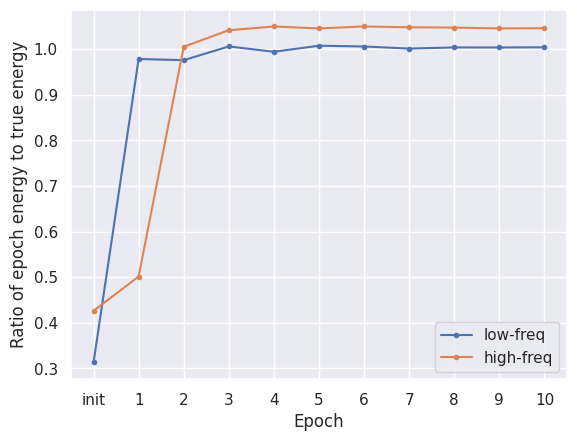

In [30]:
low = inf_ratios.iloc[0, :]
high = inf_ratios.iloc[-1, :]

plt.plot(low, marker='.')
plt.plot(high, marker='.')
plt.ylabel('Ratio of epoch energy to true energy')
plt.xlabel('Epoch')
plt.xticks(inf_ratios.columns ,labels = ['init', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
plt.legend(['low-freq', 'high-freq'])
plt.savefig('/results/synthetic_data/low/Informer/spectral_graphs/spectrum_ratio.png')
plt.show()